<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#План-проекта" data-toc-modified-id="План-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>План проекта</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## План проекта
**1. Загрузка данных**

**Первичное исследование данных:** 
* Импорт необходимых библиотек
* Чтение файлов и сохранение полученных данных в переменные
* Получение общей информации о таблицах (head, info, describe)
* Графическое представление данных из таблиц
* Выводы

**2. Умножение матриц:**
* Теоретическое доказательство неизменности качества линейной регресии при умножение на обратимую матрицу
* Выводы

**3. Алгоритм преобразования:**
* Описание алгоритма преобразования

**4. Проверка алгоритма:**
* Проверка качества линейной регрессии до и после преобразования
* Выводы

**5. Общий вывод**

## Загрузка данных

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import math
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
# Напишем функцию для первичной проверки данных
def check_data(data_df):
    print ('\033[1m' + 'Изучим исходные данные'+ '\033[0m')
    print(data_df.info())
    #print(data_df.shape)
        
    missed_cells = data_df.isnull().sum().sum()/(data_df.shape[0]*(data_df.shape[1]-1))
    missed_rows = sum(data_df.isnull().sum(axis = 1)>0)/data_df.shape[0]
    print ('\033[1m' + '\nПроверка пропусков'+ '\033[0m')
    print ('Количество пропусков: {:.0f}'.format(data_df.isnull().sum().sum()))
    print ('Доля пропусков: {:.1%}'.format(missed_cells)+ '\033[0m')
    print ('Доля строк содержащих пропуски: {:.1%}'.format(missed_rows))

    ## Проверим дубликаты
    print ('\033[1m' + '\nПроверка на дубликаты'+ '\033[0m')
    print('Количество полных дубликатов: ', data_df.duplicated().sum())
        
    ## Посмотрим на сами данные
    print ('\033[1m' + '\nПервые пять строк датасета'+ '\033[0m')
    display(data_df.head())
    
    print('\033[1m' + '\nОписание количественных данных:'+ '\033[0m')
    display(data_df.describe().T)

In [3]:
def plot_hist(data, col_column):
    '''
    Функция отрисовки гистограмм и ящика с усами для количесвтенных переменных.
    На вход: исходная таблица и список количественных переменных.
    На выходе: графики
    '''
    rows = len(col_column)
    f, ax = plt.subplots(rows,2, figsize=(8, 15))
    f.tight_layout()
    f.set_figheight(30)
    f.set_figwidth(14)
    plt.rcParams.update({'font.size': 18})
    
    for i, col in enumerate(col_column):         
        sns.histplot(data[col], kde=True, bins=24, ax = ax[i, 0])                    
        sns.boxplot(data[col], ax = ax[i, 1])

        ax[i, 0].set_xlabel(col)
        ax[i, 1].set_xlabel(col)
        ax[i, 0].set_ylabel('Количество')
    plt.suptitle("Гистограмма и ящик с усами для количественных данных", fontsize=22, y=1.01)
    plt.show()

In [4]:
# Считываем данные из csv-файла в датафрейм и сохраняем в переменной data
try:
    data = pd.read_csv('/datasets/insurance.csv')    
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

In [5]:
data.head(5)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [6]:
# описательный анализ полной выборки
check_data(data)

Изучим исходные данные
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None

Проверка пропусков
Количество пропусков: 0
Доля пропусков: 0.0%
Доля строк содержащих пропуски: 0.0%

Проверка на дубликаты
Количество полных дубликатов:  153

Первые пять строк датасета


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0



Описание количественных данных:


,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


Загруженная таблица соответствует заданию.

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.  
Целевой признак: количество страховых выплат клиенту за последние 5 лет.

In [7]:
#Проверим дубликаты
data[data.duplicated()]

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0
...,...,...,...,...,...
4793,1,24.0,37800.0,0,0
4902,1,35.0,38700.0,1,0
4935,1,19.0,32700.0,0,0
4945,1,21.0,45800.0,0,0


In [8]:
#Приведем столбцы Возраст и Зарплата к целочисленному типу 
data[['Возраст', 'Зарплата']] = data[['Возраст', 'Зарплата']].astype(int)

Так как данные без уникальный идентификаторов пользователей, то скорее всего дублирующиеся строки принадлежат к разным пользователям, у которых одинаковые признаки. Удалять такие строки мы не будем

In [9]:
# ГРАФИЧЕСКИЙ АНАЛИЗ данных
num_features = data.select_dtypes(exclude=[object]).columns

# Проверка
num_features

Index(['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты'], dtype='object')

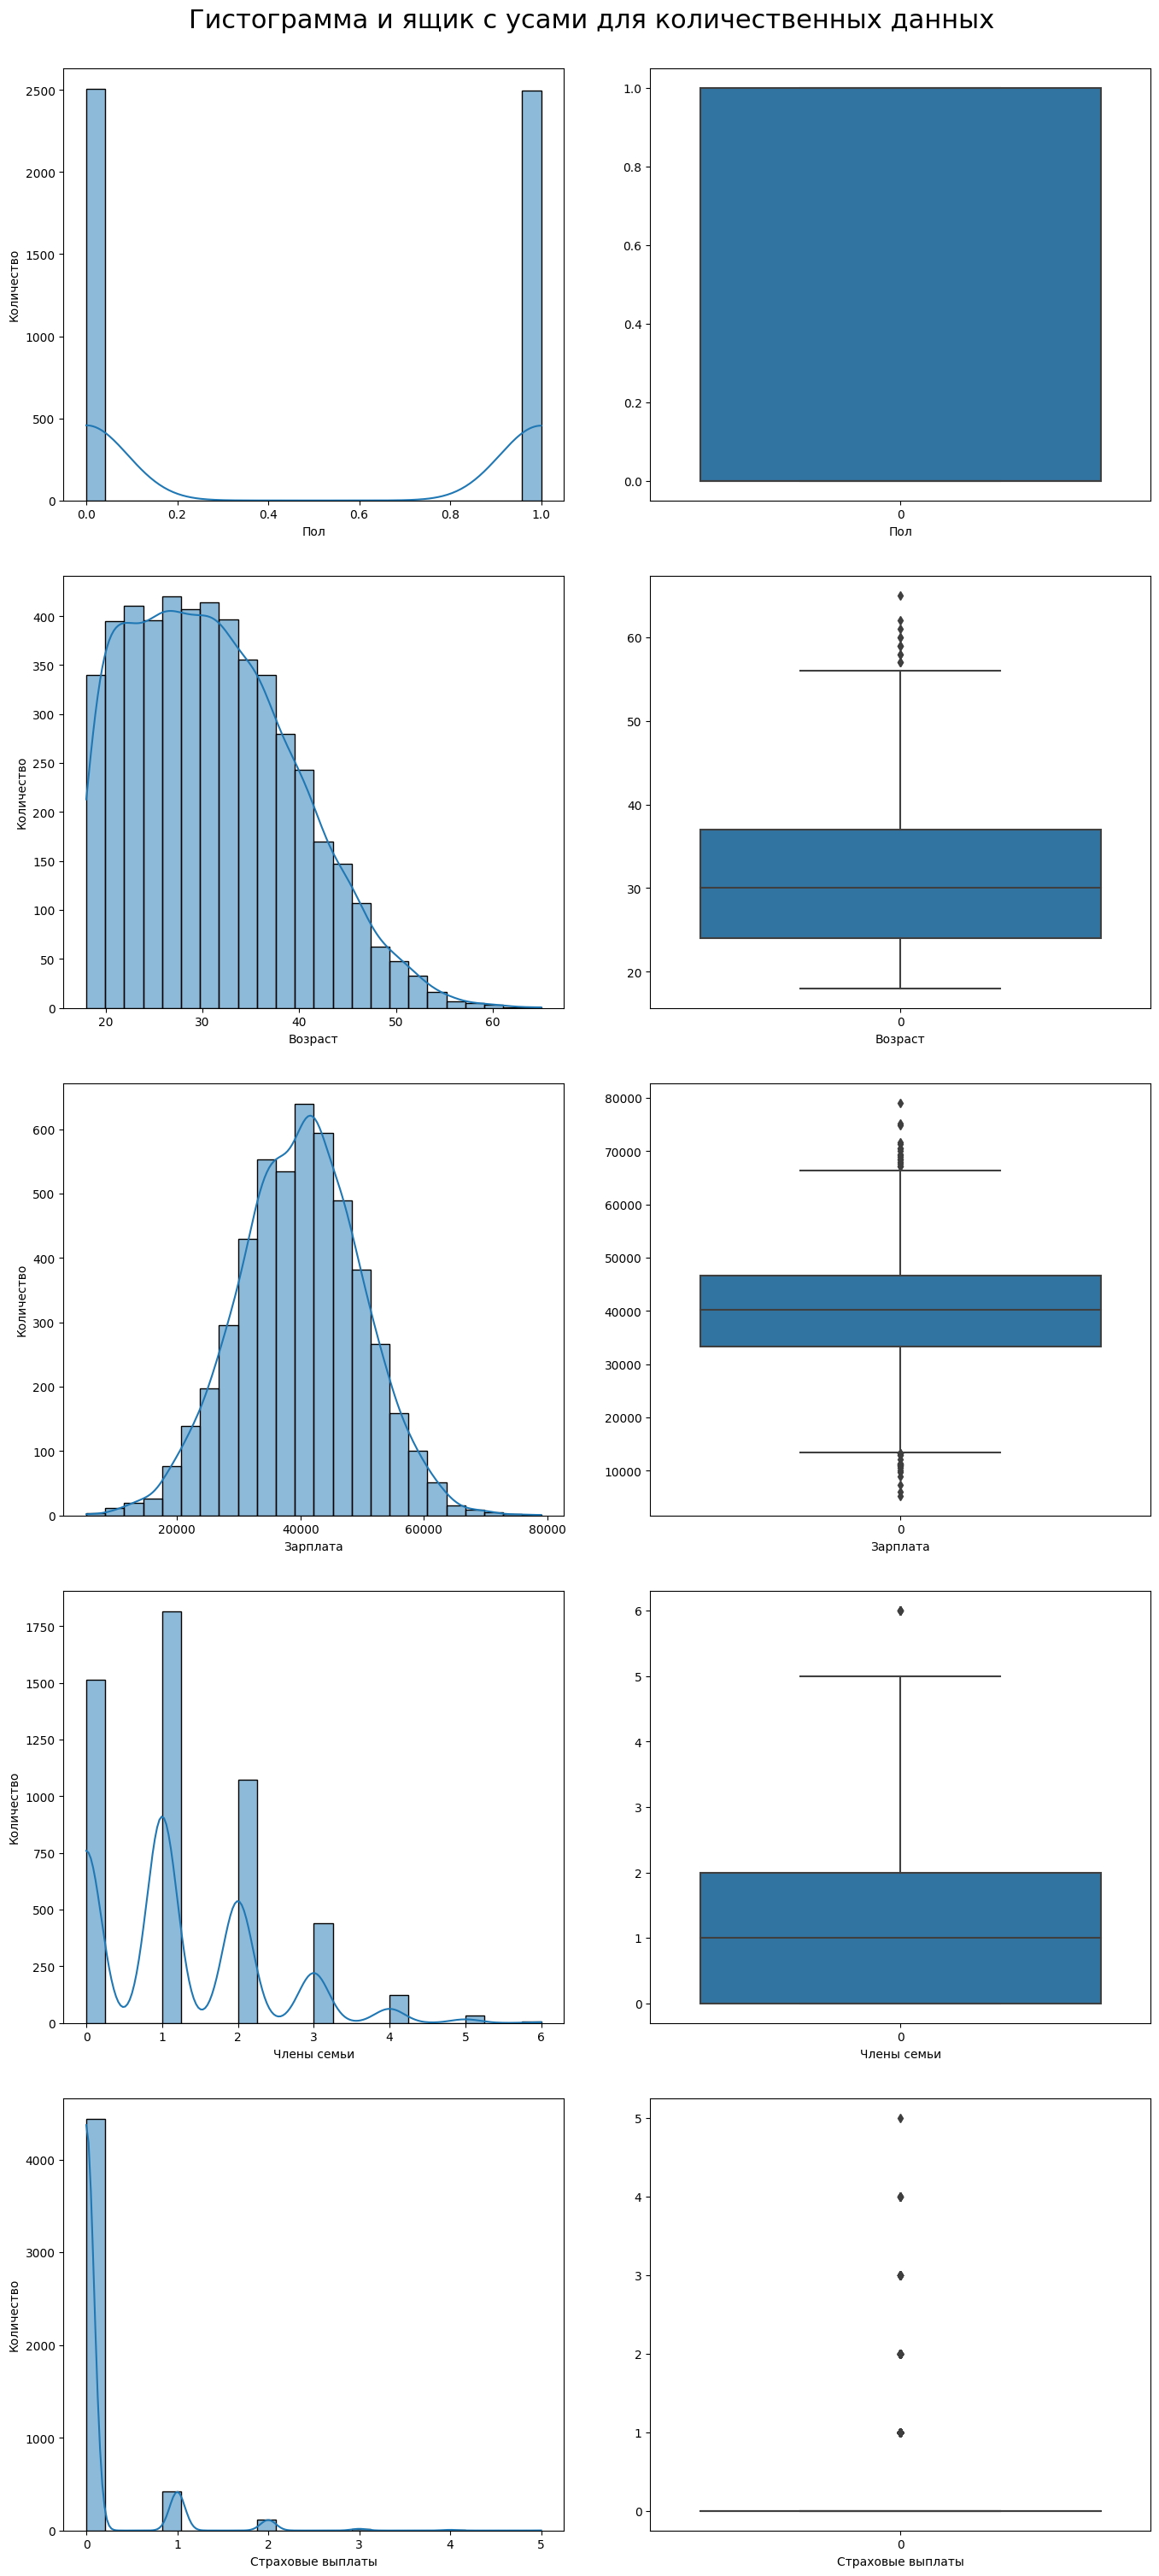

In [10]:
plot_hist(data, num_features)

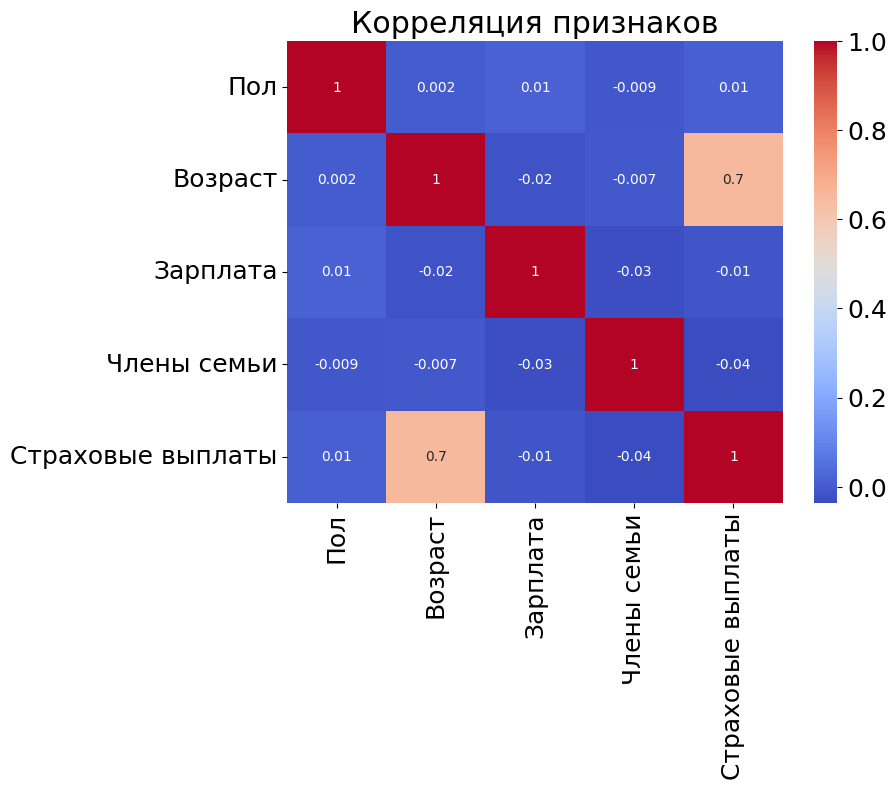

In [11]:
# Корреляционный анализ данных
plt.close()
plt.figure(figsize=(8, 6))
title = 'Корреляция признаков'
plt.title(title)
sns.heatmap(data.corr(method='pearson'), annot = True, cmap="coolwarm", annot_kws={'size':10}, fmt='.1g')
plt.show()

Из корреляционного анализа видно, что между возрастом и колличеством выплат есть положительная зависимость.

**Вывод: Исходя из полученных графиков и информации о датасете видно что датасет предобработан: в нем нету пропущенных значений, дубликатов и некорректных значений. Можно приступать к поставленной задаче.**

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Для доказательства будем использовать свойста матриц:  
$A(BC) = (AB)C$  
$AA^{-1}=A^{-1}A=E$  
$(AB)^T = B^TA^T$  :
$(AB)^{-1} = B^{-1}A^{-1}$  
$EA = AE = A$  

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Признаки умножаются на обратимую матрицу, это эквивалентно линейному преобразованию признакового пространства. Линейная регрессия моделирует линейную зависимость между признаками и целевой переменной. При умножении признаков на обратимую матрицу, мы изменяем коэффициенты исходной модели, но не меняем саму линейность зависимости.

**Обоснование:**

Докажем что $a=a'$

$X(X^TX)^{-1} X^Ty = XP((XP)^T(XP))^{-1} (XP)^Ty$  
$X(X^TX)^{-1} X^Ty = XPP^{-1}((XP)^TX)^{-1} (XP)^Ty$  
$X(X^TX)^{-1} X^Ty = XPP^{-1}((XP)^TX)^{-1} P^TX^Ty$  
$X(X^TX)^{-1} X^Ty = XPP^{-1}(P^TX^TX)^{-1} P^TX^Ty$   
$X(X^TX)^{-1} X^Ty = XPP^{-1}(X^TX)^{-1} (P^T)^{-1} P^TX^Ty$  
$X(X^TX)^{-1} X^Ty = XE(X^TX)^{-1} EX^Ty$  
$X(X^TX)^{-1} X^Ty = X(X^TX)^{-1}X^Ty$ 

**Вывод: В ходе исследования задачи было теоретически доказано что при умножении матрицы признаков на матрицу (в том числе и на обратимую) качество линейной регрессии не изменяется.**

## Алгоритм преобразования

Для защиты данных клиентов заданая матрица признаков криентов будет умножаться на случайно сгенерированную обратимую матрицу. В итоге мы получим зашифрованные данные клиентов. Восстановление исходных даннух будет производиться умножением зашифрованной матрицы на обратную матрицу.  
Качество линейной регрессии при умножении матрицы признаков на случайную матрицу как уже было доказано в предыдущем пункте не изменяется. 

In [12]:
# Создадим датасет с признакими, исключив из исходного датасета целевой признак
features = data.drop(['Страховые выплаты'], axis=1)
# Создадим датасет с целевым признаком
target = data['Страховые выплаты']

In [13]:
def generate_random_invertible_matrix(dim):
    while True:
        matrix = np.random.randint(low=-10, high=10, size=(dim, dim))  # Создаем случайную матрицу заданного размера
        if np.linalg.det(matrix) != 0:  # Проверка на обратимость
            inverse_matrix = np.linalg.inv(matrix)  # Вычисляем обратную матрицу
            product = matrix @ inverse_matrix  # Произведение матрицы на обратную матрицу
            if np.array_equal(product, np.eye(dim)):  # Проверка на равенство единичной матрице
                return matrix

In [14]:
dimension = features.values.shape[1]
random_matrix = generate_random_invertible_matrix(dimension)
print(random_matrix)

[[ 8 -8  0 -1]
 [ 7  1  9  9]
 [-5 -3 -7  6]
 [-3 -1 -6 -8]]


In [15]:
features_changed = features.values @ random_matrix

## Проверка алгоритма

In [16]:
model = LinearRegression()

scores = cross_val_score(model, features, target, cv=5, scoring='r2')
final_score = sum(scores)/len(scores)
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 0.4231137692077528


In [17]:
model_changed = LinearRegression()

scores_changed = cross_val_score(model_changed, features_changed, target, cv=5, scoring='r2')
final_score_changed = sum(scores_changed)/len(scores_changed)
print('Средняя оценка качества модели:', final_score_changed)

Средняя оценка качества модели: 0.4231137692077821


Как видим средняя оценка качества модели после умножения матрицы признаков на случайную матрицу действительно не поменялась.

In [18]:
#Восстановим преобразованные данные
features_restored_np = features_changed @ np.linalg.inv(random_matrix)

In [19]:
features_restored = pd.DataFrame(features_restored_np, columns = features.columns)
features_restored[['Пол', 'Возраст', 'Зарплата', 'Члены семьи']] = features_restored[['Пол', 'Возраст', 'Зарплата', 'Члены семьи']].astype(int)

In [20]:
features_restored.head(5)

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


In [21]:
#Проверим что данные после преобразований не изменились
check = features_restored - features
print(check.values.sum())

0


**Вывод: Используя предложенный алгоритм шифрования (умножение матрицы признаков на случайную обратимую матрицу) удалось защитить данные пользователей. Неизменность качества линейной регрессии при данном преобразовании была проверена практически**

## Общий вывод

В рамках данного исследования были загружены и изучены данные данные клиентов страховой компании. Были исследованы зависимости между данными: количество страховых выплат сильно зависит от возраста.

В ходе исследования задачи был разработан алгоритм шифрования данных (умножение матрицы признаков на случайную обратимую матрицу) и восстановления данных (умножение зашифрованной матрицы признаков на обратную матрицу). Было теоретически доказано что качество линейной регрессии при использваонии данного алгоритма не изменяется. Неизменность качества линейной регрессии при данном преобразовании также была проверена практически.